In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Find $x=cos(x)$ root

In [3]:
#testing with a transcendental function
f = lambda x: np.cos(x) - x

## Newton Method

### From Scratch

In [4]:
#the first-order derivative 
def df(f):
    def dd(x, epsilon=1e-10):
        return (f(x+epsilon) - f(x)) / epsilon
    return dd

In [5]:
#Newton method: assumption f is first-order derivative
def newton_method(f, x0, tol=1e-10, num_iter=1000):
    x = []
    x.append(x0)
    for k in range(num_iter):
        x.append(x[k] - f(x[k]) / df(f)(x[k]))
        if abs(f(x[k+1])) < tol:
            print("the number of iteration: ", k+1)
            break
        
    return x[-1], x

In [6]:
root, root_n = newton_method(f, 1)
root

the number of iteration:  4


0.7390851332151607

In [7]:
root_n

[1,
 0.7503637763028438,
 0.7391128886546252,
 0.7390851333819606,
 0.7390851332151607]

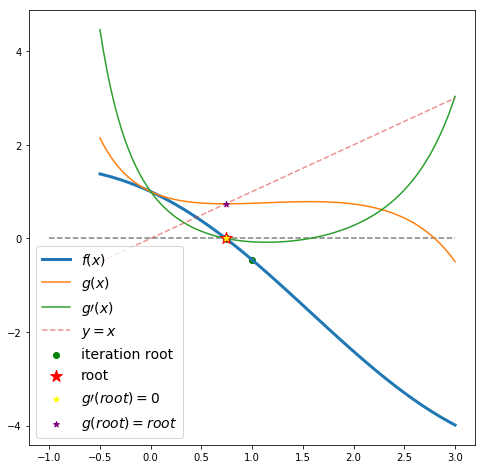

In [8]:
g = lambda x: x - (np.cos(x) - x) / (-np.sin(x) - 1)
dg = lambda x: (np.cos(x)* (np.cos(x) - x)) / (1 + np.sin(x))**2

plt.figure(figsize=(8, 8))
xn = np.linspace(-0.5, 3, 100)
plt.plot(xn, f(xn), linewidth=3, label="$f(x)$")
plt.scatter(root_n, f(root_n), c='g', label="iteration root")
plt.scatter(root, f(root), c='r', marker='*', zorder=5, s=150, label="root")

plt.scatter(root, dg(root), marker='*', c='yellow', zorder=10, label="$g\prime(root)=0$")
plt.plot(xn, g(xn), label="$g(x)$")
plt.scatter(root, g(root), marker='*', c='purple', zorder=10, label="$g(root)=root$")
plt.plot(xn, dg(xn), label="$g\prime(x)$")
plt.plot(xn, xn, linestyle='--', alpha=0.5, label="$y=x$")
plt.hlines(0, -1, 3, linestyles='--', alpha=0.5)
plt.legend(fontsize=14)
plt.show()

verification:

In [9]:
dg(root)

0.0

In [10]:
np.equal(root, g(root))

True

### Using `Scipy`

In [11]:
import scipy.optimize as optimize

f_prime = lambda x: -np.sin(x) - 1
optimize.newton(f, 5, fprime=f_prime)

0.7390851332151607